# 2.- Indicadores de Tendencia
#### ¿Qué es un Indicador de Tendencia?
Un indicador de tendencia es una herramienta de análisis técnico utilizada para identificar la dirección general del mercado o de un activo específico (como una acción, un índice o una criptomoneda). Los indicadores de tendencia ayudan a determinar si el mercado está en una tendencia alcista (precios subiendo), bajista (precios bajando) o lateral (precios moviéndose dentro de un rango sin una dirección clara).

#### ¿Por Qué Son Importantes?

- _Identificación de la Dirección del Mercado_: Los indicadores de tendencia ayudan a identificar si el mercado está subiendo, bajando o moviéndose de manera lateral. Esto es crucial para tomar decisiones informadas sobre cuándo comprar, vender o mantener una posición.
- _Reducción del Ruido del Mercado_: En el corto plazo, los precios pueden fluctuar de manera caótica debido a múltiples factores. Los indicadores de tendencia suavizan estas fluctuaciones para mostrar una visión más clara de la dirección general.
- _Confirmación de la Tendencia_: Ayudan a confirmar la dirección de la tendencia observada, lo que puede ser útil para validar las decisiones comerciales.
- _Señales de Entrada y Salida_: Proporcionan señales sobre cuándo entrar o salir del mercado. Por ejemplo, cuando una acción cruza una media móvil hacia arriba, podría ser una señal de compra, y cuando cruza hacia abajo, podría ser una señal de venta.

#### Algunos ejemplos de indicadores de tendencia
- Media Móvil Simple $SMA$
- Media Móvil Exponencial $EMA$
- Media Móvil Ponderada $WMA$
- Bandas de Bollinger
- Indicador de Convergencia/Divergencia de Medias Móviles $MACD$
- Parabolic SAR
- Índice Direccional Medio $ADX$

#### ¿Cuales estudiaremos aquí?
- Medias móviles
- ADX
- Bandas de Bollinger



## 2.1.- Medias Moviles
Las medias móviles son indicadores de análisis técnico que suavizan los precios de un activo a lo largo de un período de tiempo específico para identificar la dirección general de la tendencia. Hay varios tipos de medias móviles, pero las dos más comunes son la Media Móvil Simple $SMA$ y la Media Móvil Exponencial $EMA$.



### 2.1.1 Simple Moving Average - Media Móvil Simple - _(SMA)_

**Descipción:** 

La Media Móvil Simple $SMA$ es el promedio aritmético de los precios de cierre de un activo durante un período de tiempo específico. Se utiliza para suavizar los datos de precios y reducir el "ruido" para identificar la tendencia subyacente.

**Formula:**

La fórmula para la Media Móvil Simple $SMA$ es:

$$
\text{SMA} = \frac{P_1 + P_2 + \ldots + P_n}{n}
$$

Donde:
- $P_1$, $P_2$, ..., $P_n$ son los precios de cierre de los últimos n días.
- $n$ es el número de días del período.

**Algoritmo:**
1. Suma los precios de cierre de los últimos $n$ días.
2. Divide la suma entre $n$ para obtener la SMA.

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre $P_t$ |
|-----|------------------|
| 1   | 20               |
| 2   | 21               |
| 3   | 22               |
| 4   | 23               |
| 5   | 24               |

La $SMA$ de 5 días se calcula como:

$$
\text{SMA} = \frac{20 + 21 + 22 + 23 + 24}{5} = 22
$$





In [168]:
!pip install pandas_ta
!pip install setuptools
!pip install openpyxl



In [169]:
# traemos los datos

import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.graph_objects as go
import nbformat
import plotly.io as pio
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os 
import numpy as np 

# EJEMPLO CON YAHOO FINANZAS
ticker_symbol = 'BTC-USD'
ticker = yf.Ticker(ticker_symbol)

# Obtener el historial de precios
years=5
end_date= dt.datetime.now() # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los ultimos datos
start_date = end_date- dt.timedelta(365*years) # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los primeros datos
period='5d' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval='1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# bajamos los datos
data = ticker.history(start=start_date, end=end_date, interval=interval)
# ticker_data=ticker.history(period=period, interval=interval)
# print(ticker_data)
# data.head()

In [170]:
# cogemos los valores de los precios de cierre
close_prices = data['Close'].values

# creamso un array del tamaño de los precios de cierre con valores nan
sma_50_calculada = np.full_like(close_prices, np.nan)

# definimos el periodo de la media movil
periodo = 50

for i in range(close_prices.size):
    if i >= periodo-1:
        slice_data = close_prices[i - periodo + 1:i + 1] # el i+1 de la segunda parte de la expresion es porque si solo pusiera i, no incluye ese valor. hay que sumarle 1
        sma_50_calculada[i] = np.nanmean(slice_data)  # Calcula la media ignorando NaNs usando np.nanmean
    else:
        sma_50_calculada[i] = np.nan

In [171]:
# SMA Pandas

periodos = 50
data['SMA_50'] = data['Close'].rolling(window=periodos).mean()

# Mostrar los primeros 10 registros con la SMA calculada
# data.head()


In [172]:
# SMA Pandas TA
data['SMA_50_ta'] = ta.sma(data['Close'], length=periodos)

In [173]:
# miramos si ambas son iguales
comparison_mask = np.isnan(data['SMA_50'].values) & np.isnan(sma_50_calculada)

if np.array_equal(data['SMA_50'][~comparison_mask], sma_50_calculada[~comparison_mask]):
    print("Los arrays son iguales, ignorando NaNs.")
else:
    print("Los arrays son diferentes.")

Los arrays son iguales, ignorando NaNs.


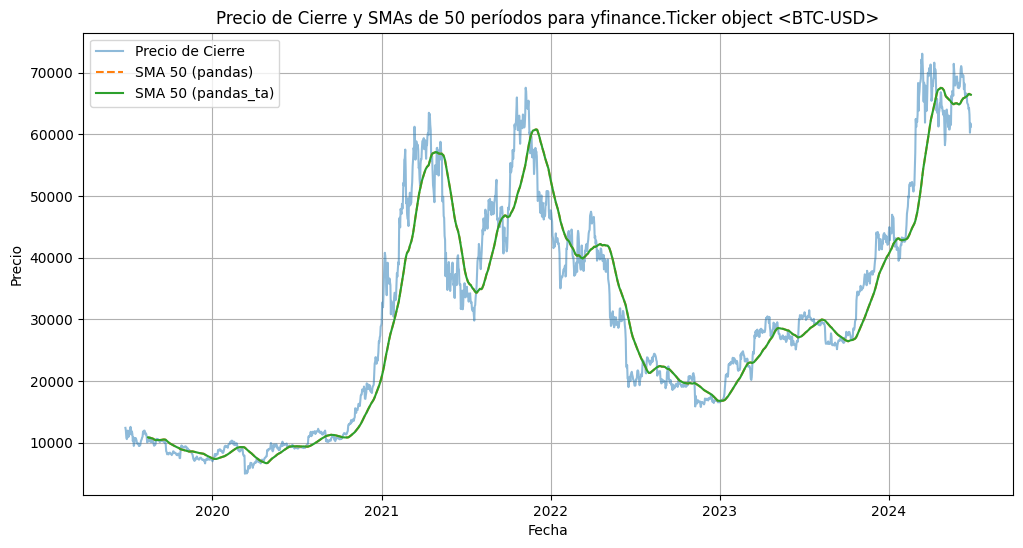

In [174]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data['SMA_50'], label='SMA 50 (pandas)', linestyle='--')
plt.plot(data.index, data['SMA_50_ta'], label='SMA 50 (pandas_ta)')
plt.title(f'Precio de Cierre y SMAs de 50 períodos para {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], 
                         mode='lines', name='SMA 50', 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y SMA 50 ({ticker})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True,  # Mostrar slider de zoom
                  template='plotly_dark')  # Estilo oscuro

# Mostrar el gráfico interactivo
fig.show()

### 2.1.2 Exponential Moving Average - Media Móvil Exponencial - $EMA$

**Descripcion:**

La $EMA$ (Exponential Moving Average) es un tipo de media móvil que otorga más peso a los precios recientes, lo que la hace más sensible a los cambios recientes en el precio de un activo.

**Formula:**

La fórmula para calcular la $EMA$ en el período es:
$$
\text{EMA}_t = (P_t \times \alpha) + (\text{EMA}_{t-1} \times (1 - \alpha))
$$

donde:
$$
\alpha = \frac{smoothing factor}{n + 1}
$$

- $smoothing factor$ normalmente es igual a 2
- $P_t$ es el precio en el tiempo $t$.
- $EMA_t$ es el valor de la EMA en el tiempo $t$.
- $EMA_{t-1}$ es el valor de la EMA en el tiempo ${t-1}$
- $n$ es el número de períodos.

**Algoritmo:**

1. Calcular el valor inicial, es decir, la $EMA_1$. Está se define como la $SMA$ del periodo. Los valores anteriores serian $NaN$
2. Usar la fórmula de la $EMA$ para calcular los valores siguientes:

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre $P_t$ |
|-----|--------------------------|
| 1   | 20                       |
| 2   | 21                       |
| 3   | 22                       |
| 4   | 23                       |
| 5   | 24                       |

Primero, calculamos el factor de suavizamiento $\alpha$ para una EMA de 5 días:

$$
\alpha = \frac{2}{n + 1} = \frac{2}{5 + 1} = 0.333
$$

- Día 1: $EMA_{1}$ = $SMA$ 
- Día 2: $EMA_{2}$ = $(21 \times \alpha) + (EMA_{1} \times (1 - \alpha)) = 20.333$
- Día 3: $EMA_{3}$ = $(22 \times \alpha) + (EMA_{2} \times (1 - \alpha)) = 20.889$
- Día 4: $EMA_{4}$ = $(23 \times \alpha) + (EMA_{3} \times (1 - \alpha)) = 21.593$
- Día 5: $EMA_{5}$ = $(24 \times \alpha) + (EMA_{4} \times (1 - \alpha)) = 22.395$

**Cálculos detallados:**
1. Día 1: $EMA_{1}$ = $P_1 = 20$
2. Día 2: $EMA_{2}$ = $(21 \times 0.333) + (20 \times 0.667) = 6.993 + 13.34 = 20.333$
3. Día 3: $EMA_{3}$ = $(22 \times 0.333) + (20.333 \times 0.667) = 7.326 + 13.563 = 20.889$
4. Día 4: $EMA_{4}$ = $(23 \times 0.333) + (20.889 \times 0.667) = 7.659 + 13.934 = 21.593$
5. Día 5: $EMA_{5}$ = $(24 \times 0.333) + (21.593 \times 0.667) = 7.992 + 14.403 = 22.395$




In [185]:
close_prices = data['Close'].values
periodo = 50
smoothing = 2
alpha = smoothing/(periodo+1)
ema_calculada = np.zeros_like(close_prices)

sma = np.mean(close_prices[:periodo])

ema_calculada[periodo-1] = sma

for i in range(periodo, len(close_prices)):    
    Pt = close_prices[i]
    ema_t_minus_1 = ema_calculada[i-1] 
    ema_t = (Pt*alpha)+(ema_t_minus_1*(1-alpha))
    ema_calculada[i] = ema_t
    # ema_calculada[i] = (close_prices[i]*alpha) + (ema_calculada[i-1] + (1-alpha))

data['EMA_50_calculada'] = ema_calculada


In [179]:
# Calculando la EMA de 50 días con pandas 
data['EMA_50'] = data['Close'].ewm(span=periodo, adjust=False).mean()
data['EMA_50']

Date
2019-06-28 00:00:00+00:00    12407.332031
2019-06-29 00:00:00+00:00    12389.764936
2019-06-30 00:00:00+00:00    12328.093969
2019-07-01 00:00:00+00:00    12259.664196
2019-07-02 00:00:00+00:00    12202.488256
                                 ...     
2024-06-22 00:00:00+00:00    66501.345987
2024-06-23 00:00:00+00:00    66371.128374
2024-06-24 00:00:00+00:00    66132.159186
2024-06-25 00:00:00+00:00    65962.452575
2024-06-26 00:00:00+00:00    65778.350881
Name: EMA_50, Length: 1826, dtype: float64

In [180]:
# Calcular la EMA con pandas_ta
data['EMA_50_ta'] = ta.ema(data['Close'], length=periodo)
print(data)

                                   Open          High           Low  \
Date                                                                  
2019-06-28 00:00:00+00:00  11162.167969  12445.174805  10914.495117   
2019-06-29 00:00:00+00:00  12400.763672  12400.910156  11508.378906   
2019-06-30 00:00:00+00:00  11931.991211  12178.383789  10799.008789   
2019-07-01 00:00:00+00:00  10796.930664  11206.439453  10089.314453   
2019-07-02 00:00:00+00:00  10588.683594  10912.188477   9737.884766   
...                                 ...           ...           ...   
2024-06-22 00:00:00+00:00  64113.863281  64475.468750  63929.757812   
2024-06-23 00:00:00+00:00  64248.964844  64491.703125  63180.796875   
2024-06-24 00:00:00+00:00  63173.351562  63292.527344  58601.699219   
2024-06-25 00:00:00+00:00  60266.281250  62258.261719  60239.750000   
2024-06-26 00:00:00+00:00  61789.675781  62322.386719  61216.195312   

                                  Close       Volume  Dividends  Stock Split

In [181]:
# Compara resultados
are_equal = np.array_equal(ema_calculada, data['EMA_50'].values)
print(f"¿Los resultados son iguales?: {are_equal}")



¿Los resultados son iguales?: False


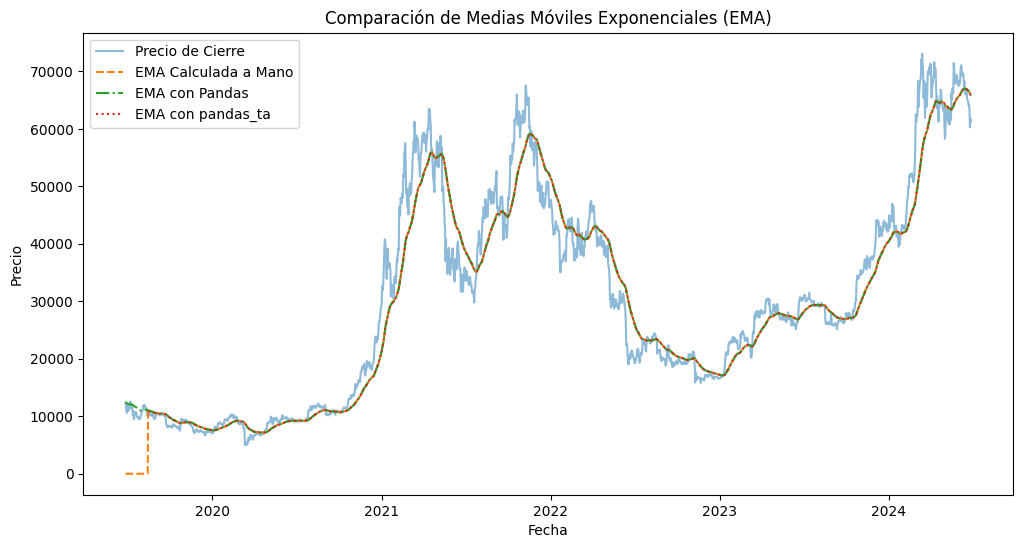

In [188]:
# Graficar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, ema_calculada, label='EMA Calculada a Mano', linestyle='--')
plt.plot(data.index, data['EMA_50'], label='EMA con Pandas', linestyle='-.')
plt.plot(data.index, data['EMA_50_ta'], label='EMA con pandas_ta', linestyle=':')
plt.title('Comparación de Medias Móviles Exponenciales (EMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()



### 2.1.3 Weighted Moving Average - Media Móvil Ponderada - _WMA_

**Descripcion:**

**Formula:**

**Ejemplo numérico:**

**Algoritmo:**
